markdown
# <center> Обучение с учителем. Регрессия
## <center> предсказание индивидуальных медицинских расходов граждан США, оплачиваемых медицинской страховкой
<img src=dataset-cover.jpg>

In [30]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

Повторим, как организуется процесс разработки DS-проектов согласно методологии CRISP-DM.

markdown
Этапы модели CRISP-DM:
1. Анализ требований
2. Исследование данных
3. Подготовка данных
4. Моделирование
5. Оценка модели
6. Внедрение

### Анализ требований
Задание: построить ML-модель, которая предсказывает индивидуальные медицинские расходы граждан США, оплачиваемые медицинской страховкой


**Знакомство с данными**

In [31]:
#читаем выданные данные
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Итак, набор данных содержит следующие столбцы:
1. age — возраст страхователя
2. sex — пол
3. bmi — индекс массы тела ($кг/м^2$), в идеале — от 18.5 до 24.9
4. children — количество детей, охваченных медицинской страховкой
5. smoker — является ли человек курящим
6. region — район проживания в США (северо-восток, юго-восток, северо-запад, юго-запад)
7. charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой


In [32]:
insurance_data.shape

(1338, 7)

In [33]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
display(insurance_data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## <center> Итерация №1
На первой итерации мы должны прийти к выводу - решаема ли задача. Может ли модель получить базовое качество (baseline). Для этого мы проводим небольшое исследование данных, базовую предобработку и строим простую модель, без подбора параметров.

### Исследование данных
Цель этого шага — понять слабые и сильные стороны предоставленных данных, определить их достаточность, оценить взаимосвязи между признаками и предложить идеи, как их использовать.
Выводим описательные статистики для числовых и категориальных признаков

In [35]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [36]:
insurance_data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [37]:
#Создаем копию данных для облегчения работы с изменениями в таблице
df = insurance_data.copy()

In [38]:
#выделяем имена числовых признаков в виде списка для удобства дальнейшей работы
types = df.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['age', 'bmi', 'children', 'charges']

Для каждого числового признака построим гистограмму признаки и диаграмму рассеяния, иллюстрирующую зависимость целевого признака от каждого из факторов. Дополнительно поверх диаграммы рассеяния построим уравнение линейной регрессии.

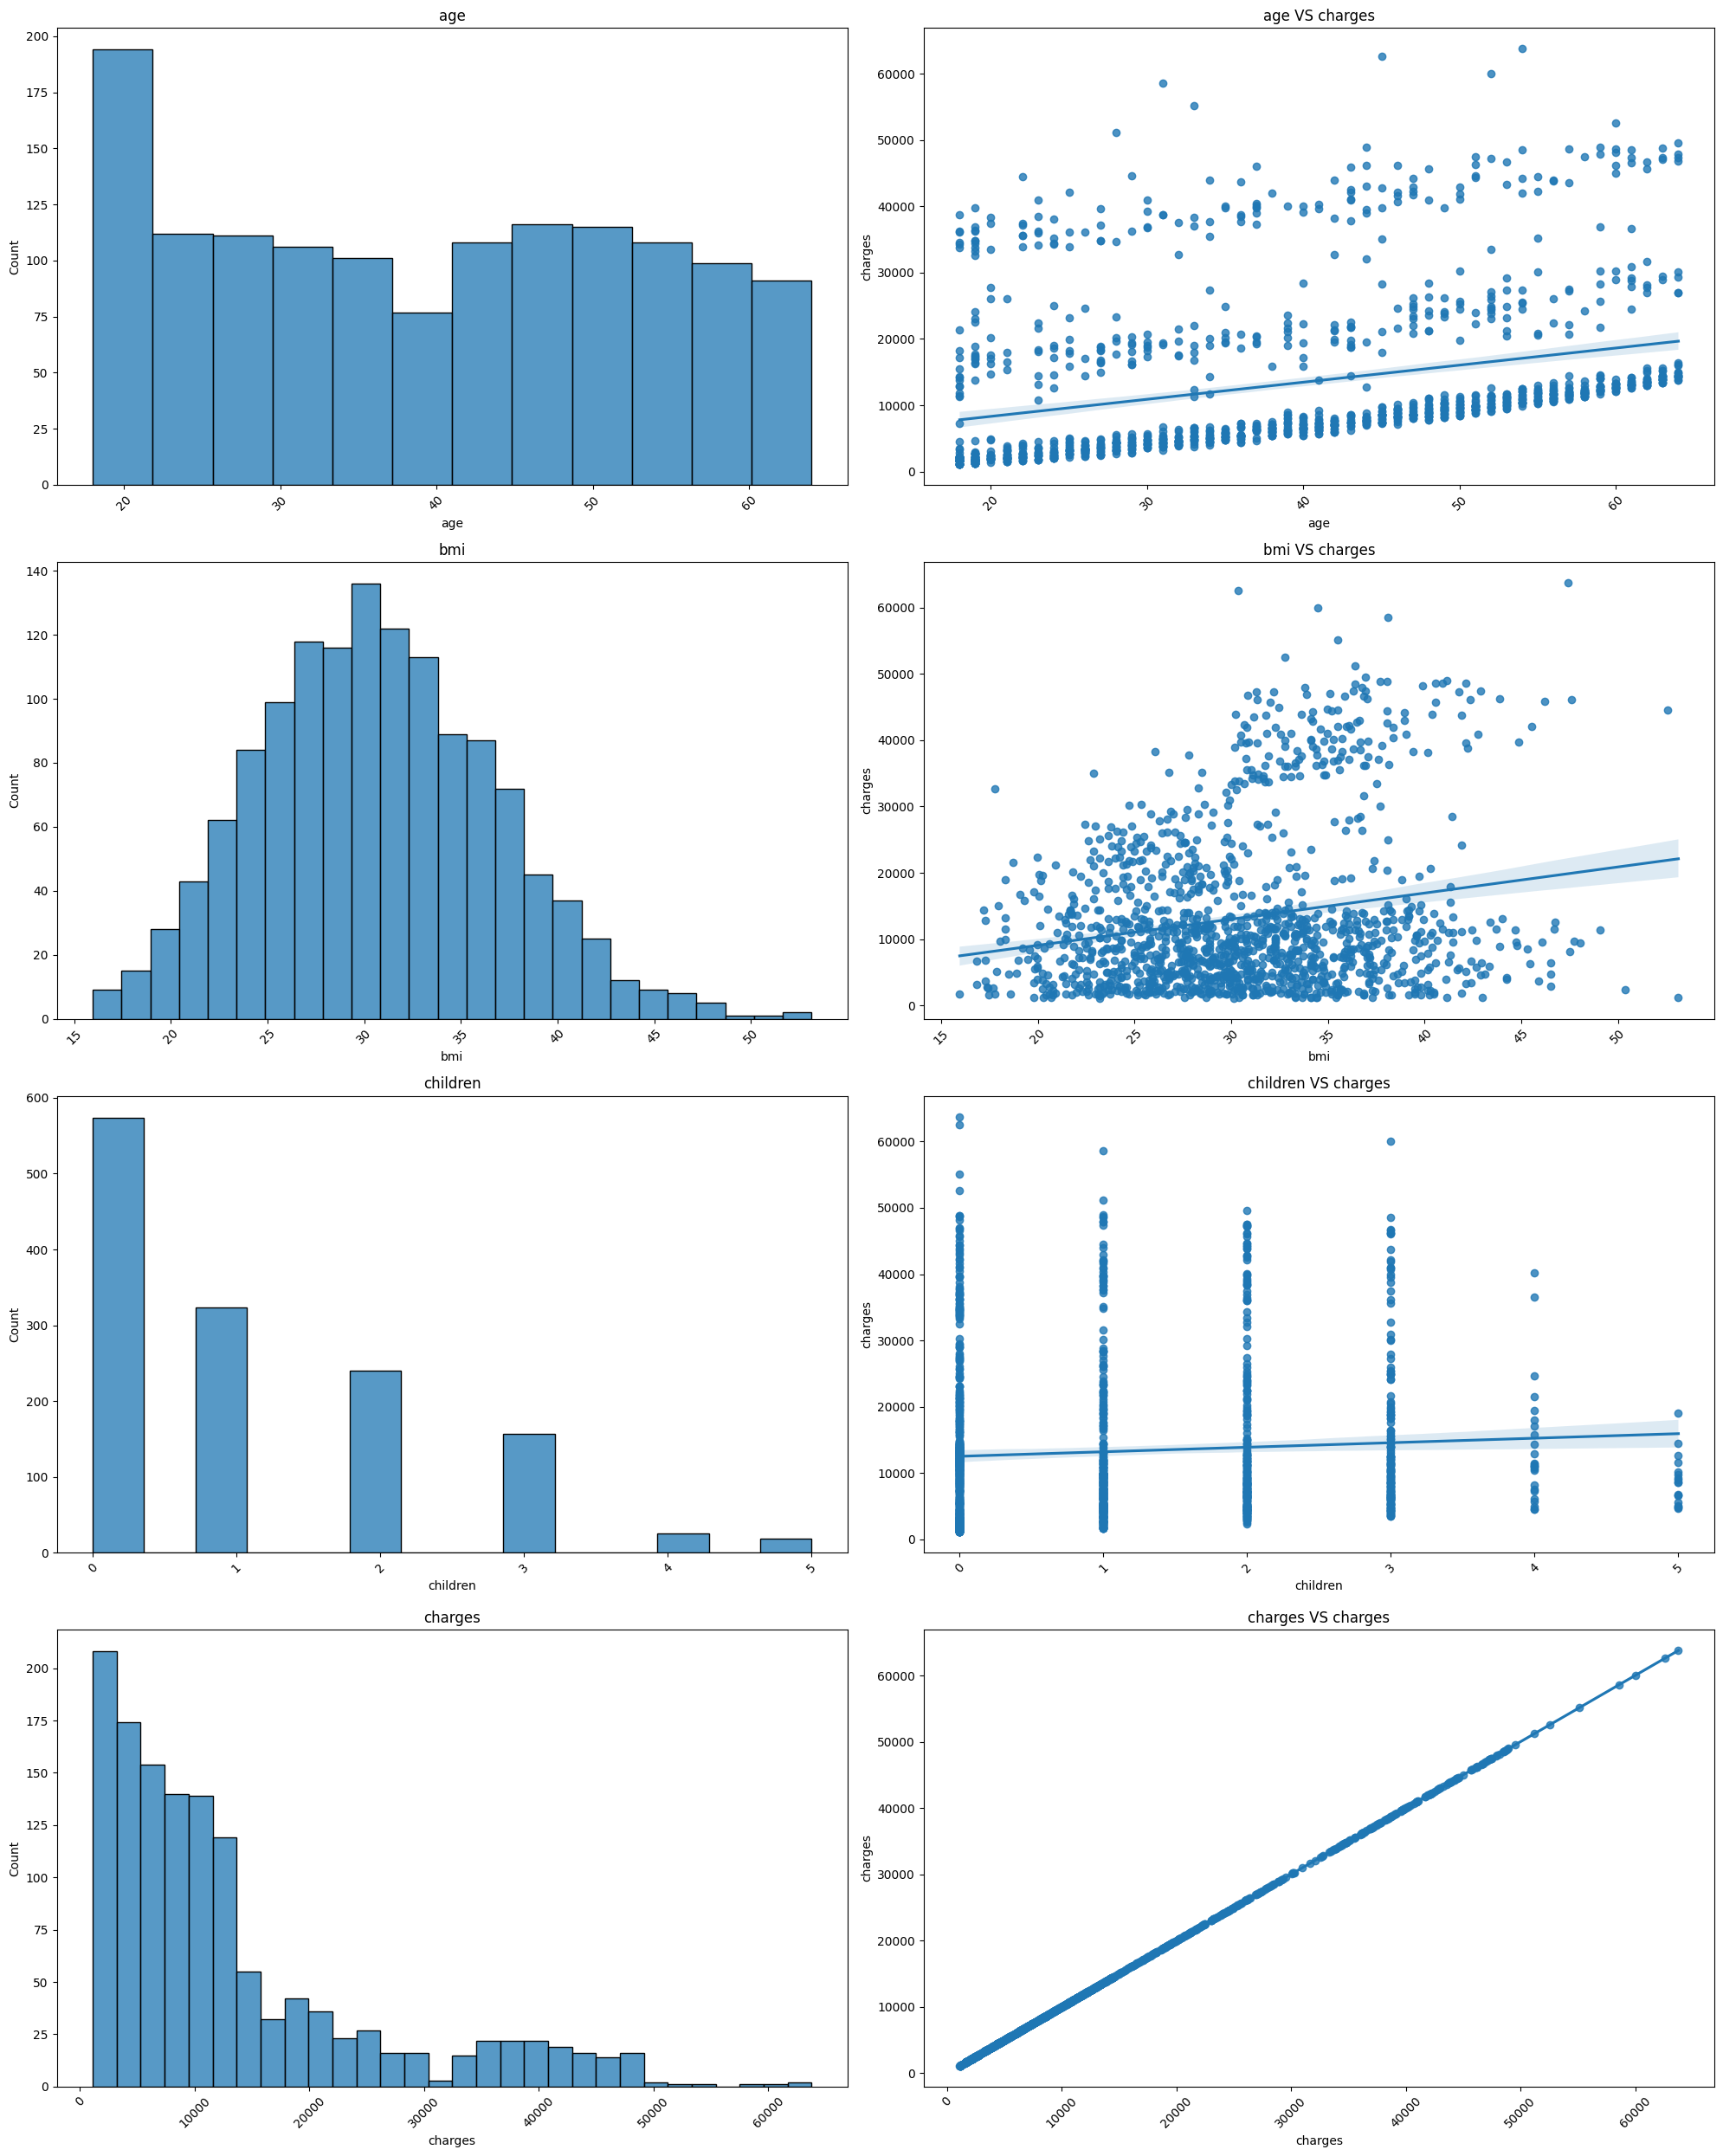

In [39]:
n=len(num_features)# количество числовых признаков
fig,ax=plt.subplots(n,2,figsize=(20,25))# солздаем фигуру 20 на 25 n на 2 координатных плоскостей.
for i,feature in enumerate(num_features): # i-индекс, feature-название признака в таблице.
    histplot=sns.histplot(data=df,x=feature,ax=ax[i][0])# гистограмма распределения признака
    histplot.set_title('{}'.format(feature))# подпись к графику
    histplot.xaxis.set_tick_params(rotation=45)# поворот отметок
    regplot=sns.regplot(data=df,x=feature,y='charges',ax=ax[i][1])# диграмма рассеивания + линейная регрессия
    regplot.set_title('{} VS charges'.format(feature))# добавляем подпись к графику
    regplot.xaxis.set_tick_params(rotation=45)# разворачиваем отметки
plt.tight_layout() #выравнивание графиков

Так же рассмотрим распределение числовых признаков на коробчатой диаграмме.

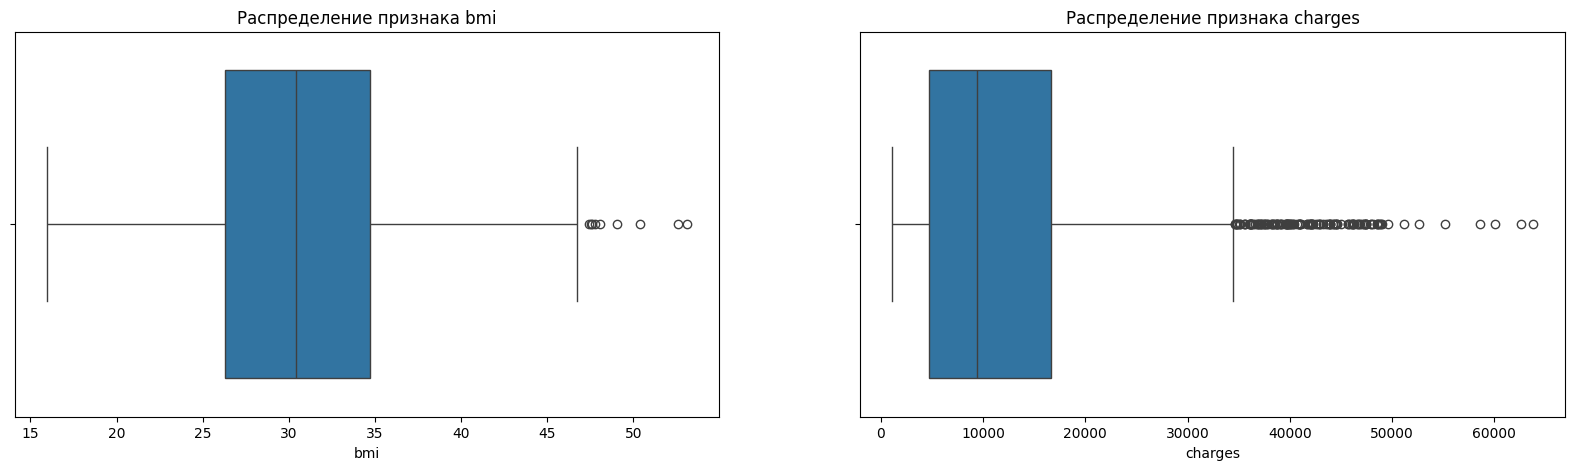

In [40]:
fig,ax1=plt.subplots(1,2,figsize=(20,5))
boxplot_bmi=sns.boxplot(data=df,x=df['bmi'],ax=ax1[0]);
boxplot_charges=sns.boxplot(data=df,x=df['charges'],ax=ax1[1]);
boxplot_bmi.set_title('Распределение признака bmi');
boxplot_charges.set_title('Распределение признака charges');

### Подготовка данных
Цель этого этапа — подготовить обучающую выборку для использования в моделировании.
Линейная регрессия, которую мы будем использовать, является моделью, которая требует численного представления данных. То есть на этапе подготовки данных мы должны позаботиться о кодировании текстовых категориальных признаков.

* smoker — переведём в бинарные значения (0 — некурящий, 1 — курящий);
* sex — аналогично (0 — female, 1 — male)

In [41]:
#кодируем бинарные категориальные признаки
df['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1)
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)

region — используем OneHot-кодирование (воспользуемся функцией get_dummies).

In [42]:
#Производим кодирование 
data = pd.get_dummies(df)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Строим тепловую карту для корреляционной матрицы, чтобы оценить мультиколлинеарную зависимость и линейную взаимосвязь между факторами и целевым признаком (price)

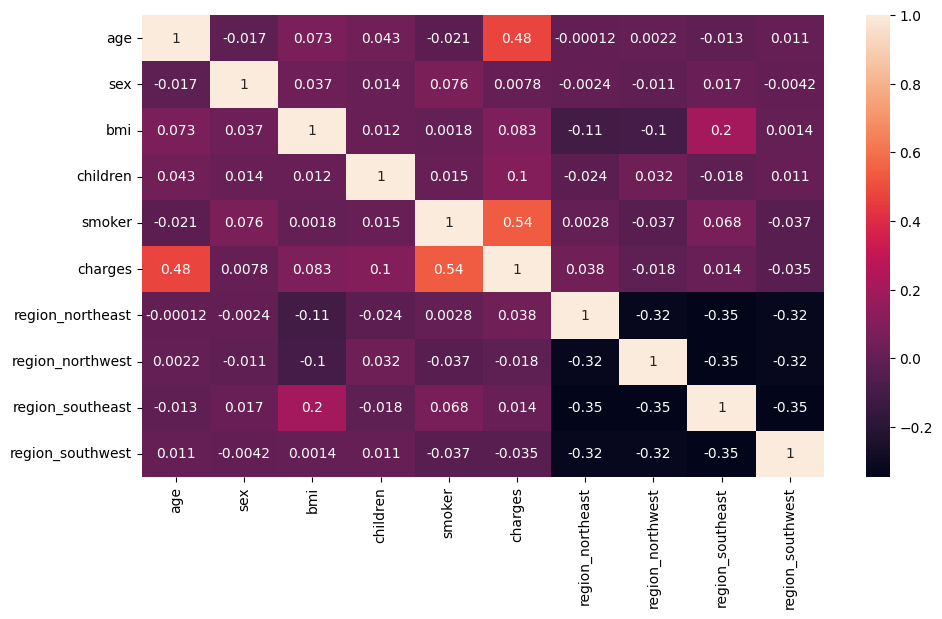

In [43]:
fig,ax2=plt.subplots(figsize=(11,6))
sns.heatmap(data.corr(method='kendall'),annot=True,ax=ax2);

Более наглядно будет видно на столбчатой диаграмме

region_northeast    0.006349
region_northwest    0.039905
region_southwest    0.043210
sex                 0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker              0.787251
charges             1.000000
Name: charges, dtype: float64

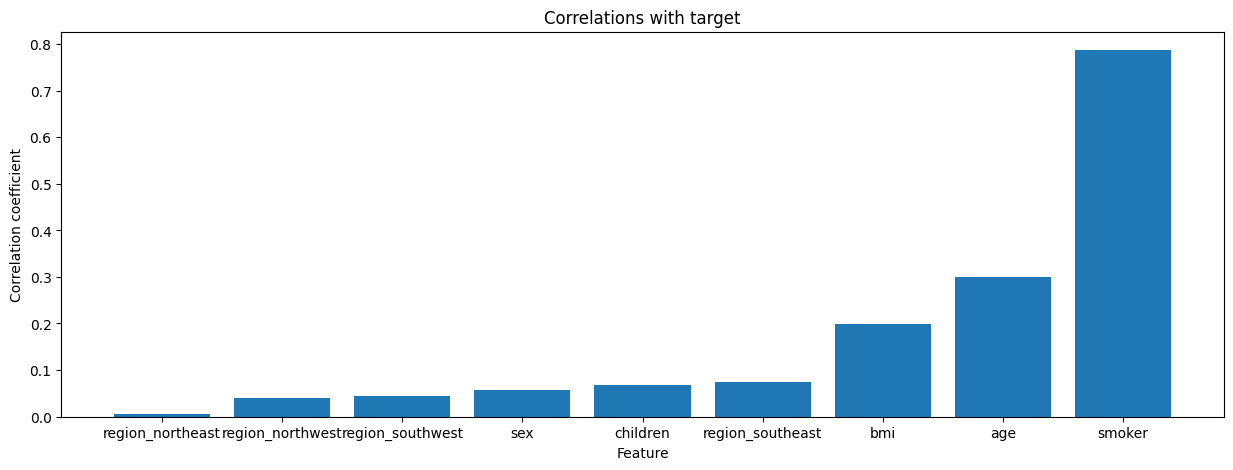

In [44]:
#Вычисляем модуль корреляции
corr_with_target = data.corr()['charges'].abs().sort_values()
display(corr_with_target)
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('charges')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(15, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

Разделим набор данных на матрицу наблюдений X (таблица из объектов и их признаков) и столбец правильных ответов y

In [45]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

Разделяем всю выборку на тренировочную и тестовую в соотношении 80/20.

На тренировочной выборке будем обучать модели, а на тестовой проверять их качество. 

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
#Выводим размеры полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1070, 9)
Test shape: (268, 9)


### Моделирование + Оценка модели
Цель этапа - построить модель, решающую поставленную задачу и оценить ее качество
Заранее создадим функцию, которая будет расчитывать метрики:

1. MAE - средняя абсолютная ошибка (целевая метрика)
2. MAPE - средняя абсолютная ошибка в процентах 
3. $R^2$ - коэффициент детерминации 

In [48]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

**Модель линейной регрессии:**

Модель линейной регрессии имеет следующий вид:
$$\widehat{y_i}= w_0+\sum_{j=0}^m w_j x_{ij}$$
где $x_{ij}$ — объект из $i$-ой строки и $j$-ого столбца из таблицы объектов-признак $X$, $y_i$ — правильный ответ, соответствующий $x_{i}$, $\omega$ — параметры линейной регрессии    
Для поиска параметров модели используется схема минизации эмпиричного риска - ищутся такие параметры $\omega$, при которых функция ошибки $L(\omega)$ была бы минимальна. 

В качестве функции потерь используем MSE - средний квадрат ошибки.
$$L(\omega) = MSE = \frac{1}{n} * \sum_{i=1}^{n}{(y_i - \widehat{y_i})^2} \Rightarrow min_\omega $$
**Аналитическое решение: метод наименьших квадратов (OLS):**
$$\omega=(X^TX)^{-1}X^Ty$$
В библиотеке sklearn линейная регрессия с поиском параметров по OLS реализована в классе LinearRegression модуля linear_model. 

Методы:
* fit() - подгонка параметров по OLS (обучение модели)
* predict() - предсказание (подстановка наблюдения $x_i$ в модель и получение ответа для каждого наблюдения)

Атрибуты:
* coef_ - найденные с помощью OLS коэффициенты $\omega_1, \omega_2,$ ...,$ \omega_m$ (в виде вектора)
* intercept_ - свободный член $\omega_0$

In [49]:
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208
Train MAPE: 42


Test R^2: 0.784
Test MAE: 4181
Train MAPE: 47


In [50]:
display(lr.intercept_.round(2))

-12390.8

Построим диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки возьмем разницу между истинным ответом и предсказанием: $y-y^2$ (без модуля).

In [51]:
error_train=y_train-y_train_pred
error_test=y_test-y_test_pred
errors=pd.DataFrame({'error_train': error_train,'error_test': error_test})


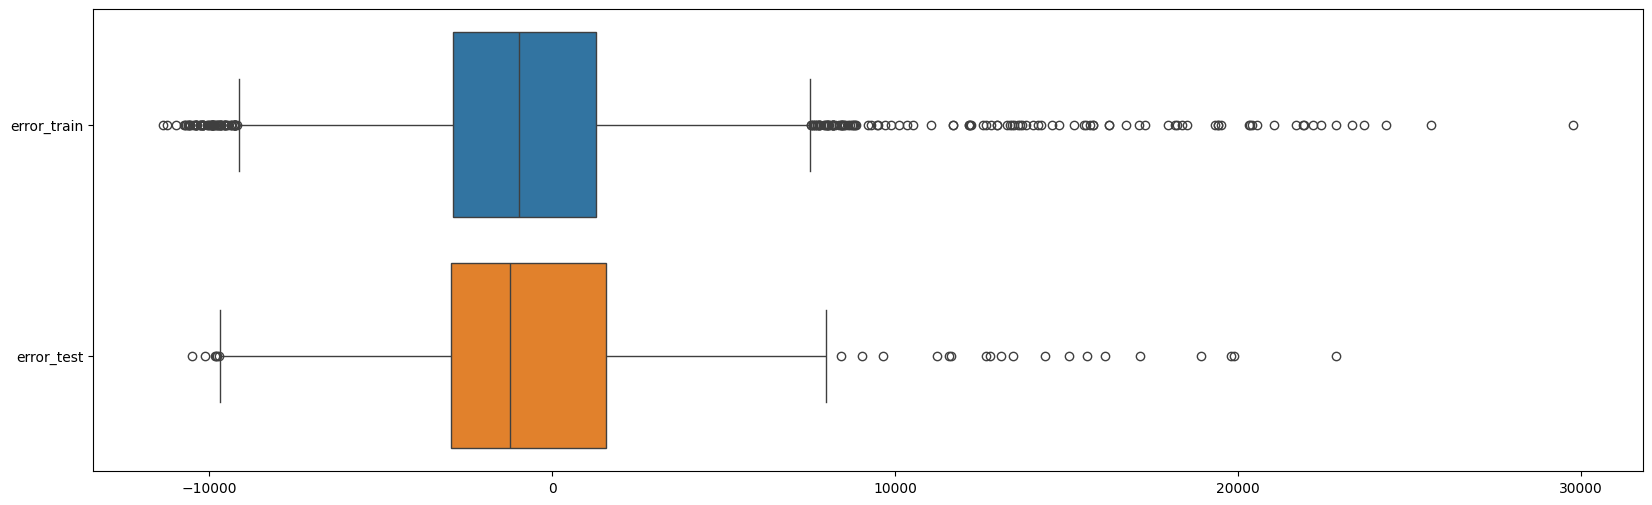

In [52]:
fig,ax3=plt.subplots(figsize=(20,6))
sns.boxplot(data=errors,orient='h');

Нормализуем тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler). Расчёт параметров нормализации (fit) произведем на тренировочной выборке.

Min-max-нормализация не искажает изначальный вид бинарных категориальных признаков, в отличие от стандартизации.

In [53]:
scaler=preprocessing.MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

На нормализованных данных сгенерируем полиномиальные признаки степени 2. Воспользуемся классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставим на False.

In [54]:
scaler_X_train=scaler.transform(X_train)
scaler_X_test=scaler.transform(X_test)
poly=preprocessing.PolynomialFeatures(include_bias=False)
poly.fit(X_train)
poly_X_train=poly.transform(scaler_X_train)
poly_X_test=poly.transform(scaler_X_test)

/home/roman/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/home/roman/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [55]:
print('Train shape: {}'.format(poly_X_train.shape))
print('Test shape: {}'.format(poly_X_test.shape))

Train shape: (1070, 54)
Test shape: (268, 54)


In [56]:
lr_poly=linear_model.LinearRegression()
lr_poly.fit(poly_X_train,y_train)
y_train_pred=lr_poly.predict(poly_X_train)
y_test_pred=lr_poly.predict(poly_X_test)

In [57]:

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.842
Train MAE: 2905
Train MAPE: 30


Test R^2: 0.866
Test MAE: 2745
Train MAPE: 31


Выведим значения коэффициентов полученной модели. 

In [58]:
lr_poly.coef_[:10]

array([-3.47975694e+16, -4.74221651e+16,  4.55019651e+15, -5.19488412e+15,
        1.93447874e+15, -1.00100802e+16, -5.54385534e+16, -1.38763518e+16,
       -3.24300151e+16,  8.44800000e+03])

Мы видим, что значения очень высокие, модель не стабильная. Попробуем сделать регуляризацию.

Построим линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используем значение по умолчанию, параметр max_iter установим в значение 2000.

In [59]:
lasso_poly=linear_model.Lasso(max_iter=2000)
lasso_poly.fit(poly_X_train,y_train)
lasso_X_train=lasso_poly.predict(poly_X_train)
lasso_X_test=lasso_poly.predict(poly_X_test)

In [60]:
print_metrics(y_train,lasso_X_train, y_test, lasso_X_test)

Train R^2: 0.842
Train MAE: 2890
Train MAPE: 29


Test R^2: 0.867
Test MAE: 2719
Train MAPE: 30


Построим линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используем значение по умолчанию.

In [61]:
poly_Ridge=linear_model.Ridge()
poly_Ridge.fit(poly_X_train,y_train)
Ridge_X_train=poly_Ridge.predict(poly_X_train)
Ridge_X_test=poly_Ridge.predict(poly_X_test)

In [62]:
print_metrics(y_train,Ridge_X_train, y_test, Ridge_X_test)

Train R^2: 0.839
Train MAE: 2949
Train MAPE: 30


Test R^2: 0.863
Test MAE: 2861
Train MAPE: 31
